# Análise das informações de `Sócios` e `Veículos` - Nilson

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
market = pd.read_csv('../desafio/estaticos_market.csv')
port1 = pd.read_csv('../desafio/port1.csv')
port2 = pd.read_csv('../desafio/port2.csv')
port3 = pd.read_csv('../desafio/port3.csv')

In [3]:
market.head(3)

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,...,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,...,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0
1,1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### **Insight relacionado a veículos**

>- fl_spa *(pode dar uma boa métrica)*: 
>    - *p1* não comercializa com quem tenha posto de combustível
>    - *p2* e *p3* comercializam, mas com valores muito menores referente aos que não comercializam.

>- fl_antt *(avaliar no modelo - provavel descarte)*:
>    - Ambos com pouca comercialização, porém *p1* com valor infimo relatívo ao todo.
    
>- fl_veiculo: *(pode dar uma boa métrica)*:
>    - *p1* não tem baixa comercialização com quem tem ao menos um veículo;
>    - Já *p2* e *p3* é o contrário, índice é de comercializar com quem tenha veículos
    
> Features abaixo não acho que irá melhorar o modelo, pelo contrário.
>- vl_total_veiculos_pesados_grupo:
>    - *p1* se diferencia dos demais tendo uma concentração muito grande em zero;
>    - *p2* e *p3* já tem uma variação maior
>
>- vl_total_veiculos_leves_grupo:
>    - Mesmo cenário acima

# Análise relatíva a `veículos`

In [4]:
veiculos = market[['id','fl_spa','fl_antt','fl_veiculo','vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo']]

- **fl_spa** -> pŕoprio posto de combustível
- **fl_antt** -> se é certificada pela ANTT para fins de transporte
- **fl_veiculo** -> se a empresa possui pelo menos um veículo
- **vl_total_veiculos_pesados_grupo** -> valor econômico dos veículos pesados da grupo econômico da empresa
- **vl_total_veiculos_leves_grupo** -> valor econômico dos veículos leves da economia grupo da empresa

In [5]:
veiculos.isnull().sum()

id                                    0
fl_spa                             1927
fl_antt                            1927
fl_veiculo                         1927
vl_total_veiculos_pesados_grupo    1927
vl_total_veiculos_leves_grupo      1927
dtype: int64

In [6]:
# Limpando os valores nulos, pois a qunatidade é mínima em relação aos total
veiculos.dropna(axis=0, inplace=True)

/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
veiculos.isnull().sum()

id                                 0
fl_spa                             0
fl_antt                            0
fl_veiculo                         0
vl_total_veiculos_pesados_grupo    0
vl_total_veiculos_leves_grupo      0
dtype: int64

In [8]:
veiculos['port1'] = veiculos.id.isin(port1.id)
veiculos['port2'] = veiculos.id.isin(port2.id)
veiculos['port3'] = veiculos.id.isin(port3.id)

/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [9]:
veiculos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460371 entries, 0 to 462297
Data columns (total 9 columns):
id                                 460371 non-null object
fl_spa                             460371 non-null object
fl_antt                            460371 non-null object
fl_veiculo                         460371 non-null object
vl_total_veiculos_pesados_grupo    460371 non-null float64
vl_total_veiculos_leves_grupo      460371 non-null float64
port1                              460371 non-null bool
port2                              460371 non-null bool
port3                              460371 non-null bool
dtypes: bool(3), float64(2), object(4)
memory usage: 25.9+ MB


### Tentando encontrar similaridade entre as variâvies

In [10]:
print(veiculos[(veiculos['port2'] == 1) & (veiculos['port3'] == 1) 
         & (veiculos['fl_spa'] == False) 
         & (veiculos['fl_antt'] == False)
         & (veiculos['fl_veiculo'] == False)]['id'].count(), 'empresas que não tem posto, não são certificadas e não tem veículos')

11 empresas que não tem posto, não são certificadas e não tem veículos


In [11]:
print(veiculos[(veiculos['port2'] == 1) & (veiculos['port3'] == 1) 
         & (veiculos['fl_spa'] == False) 
         & (veiculos['fl_antt'] == False)
         & (veiculos['fl_veiculo'] == True)]['id'].count(), 'empresas que tem veículos, mas não tem posto e não são certificada pela ANTT')

90 empresas que tem veículos, mas não tem posto e não são certificada pela ANTT


In [12]:
print(veiculos[(veiculos['port2'] == 1) & (veiculos['port3'] == 1) 
         & (veiculos['fl_spa'] == False) 
         & (veiculos['fl_antt'] == True)
         & (veiculos['fl_veiculo'] == True)]['id'].count(), 'empresas que tem veículos e são certificada pela ANTT, mas não tem posto')

4 empresas que tem veículos e são certificada pela ANTT, mas não tem posto


In [13]:
print(veiculos[(veiculos['port2'] == 1) & (veiculos['port3'] == 1) 
         & (veiculos['fl_spa'] == True) 
         & (veiculos['fl_antt'] == True)
         & (veiculos['fl_veiculo'] == True)]['id'].count(), 'empresa tem veículo, é certificada e tem posto')

1 empresa tem veículo, é certificada e tem posto


### Verificando a variável fl_spa

,port1,port2,port3
fl_spa,,,
False,555.0,539.0,255.0
True,0.0,27.0,10.0


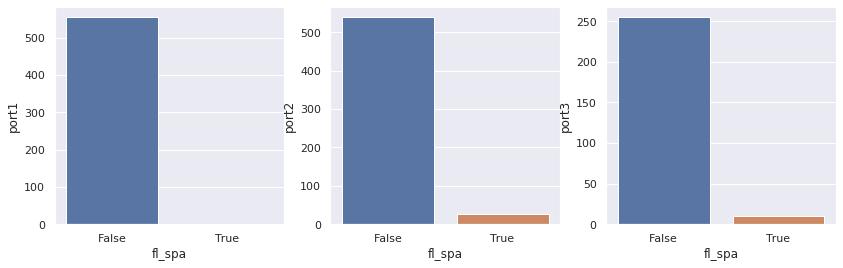

In [14]:
# Fazendo o agrupamento
fl_spap1 = veiculos.groupby(['fl_spa'])['port1'].sum().reset_index()
fl_spap2 = veiculos.groupby(['fl_spa'])['port2'].sum().reset_index()
fl_spap3 = veiculos.groupby(['fl_spa'])['port3'].sum().reset_index()

# Plotando o gráfico
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x=fl_spap1.iloc[:,0], y=fl_spap1.iloc[:,1], ax=ax1)
sns.barplot(x=fl_spap2.iloc[:,0], y=fl_spap2.iloc[:,1], ax=ax2)
sns.barplot(x=fl_spap3.iloc[:,0], y=fl_spap3.iloc[:,1], ax=ax3)

# imprimindo os números
veiculos.groupby(['fl_spa'])['port1','port2','port3'].sum()

### Verificando a variável fl_antt

,port1,port2,port3
fl_antt,,,
False,551.0,474.0,253.0
True,4.0,92.0,12.0


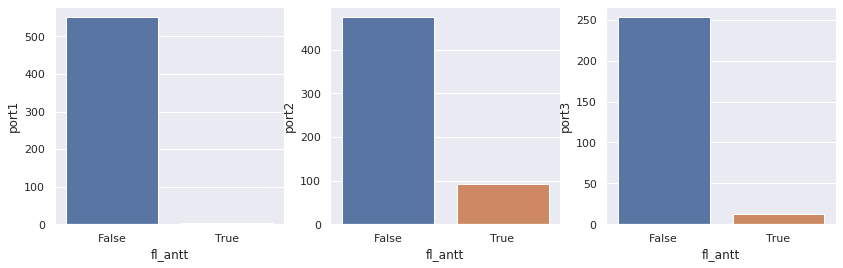

In [15]:
# Fazendo o agrupamento
fl_anttp1 = veiculos.groupby(['fl_antt'])['port1'].sum().reset_index()
fl_anttp2 = veiculos.groupby(['fl_antt'])['port2'].sum().reset_index()
fl_anttp3 = veiculos.groupby(['fl_antt'])['port3'].sum().reset_index()

# Plotando o gráfico
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x=fl_anttp1.iloc[:,0], y=fl_anttp1.iloc[:,1], ax=ax1)
sns.barplot(x=fl_anttp2.iloc[:,0], y=fl_anttp2.iloc[:,1], ax=ax2)
sns.barplot(x=fl_anttp3.iloc[:,0], y=fl_anttp3.iloc[:,1], ax=ax3)

# imprimindo os números
veiculos.groupby(['fl_antt'])['port1', 'port2', 'port3'].sum()

### Verificando a variável fl_veiculo

,port1,port2,port3
fl_veiculo,,,
False,517.0,76.0,44.0
True,38.0,490.0,221.0


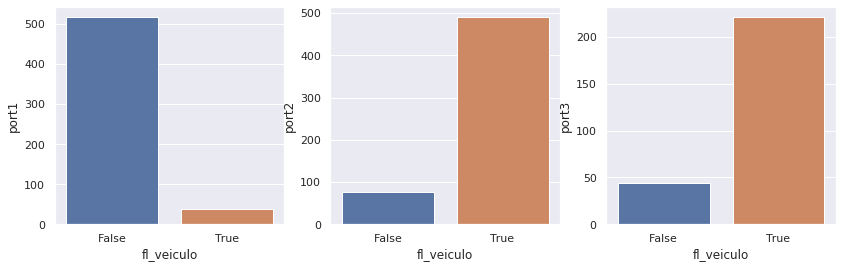

In [16]:
# Fazendo o agrupamento
fl_veiculop1 = veiculos.groupby(['fl_veiculo'])['port1'].sum().reset_index()
fl_veiculop2 = veiculos.groupby(['fl_veiculo'])['port2'].sum().reset_index()
fl_veiculop3 = veiculos.groupby(['fl_veiculo'])['port3'].sum().reset_index()

# Plotando o gráfico
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
sns.barplot(x=fl_veiculop1.iloc[:,0], y=fl_veiculop1.iloc[:,1], ax=ax1)
sns.barplot(x=fl_veiculop2.iloc[:,0], y=fl_veiculop2.iloc[:,1], ax=ax2)
sns.barplot(x=fl_veiculop3.iloc[:,0], y=fl_veiculop3.iloc[:,1], ax=ax3)

# imprimindo os números
veiculos.groupby(['fl_veiculo'])['port1', 'port2', 'port3'].sum()

### Verificando a variável vl_total_veiculos_pesados_grupo

     vl_total_veiculos_pesados_grupo  port1
0                                0.0  535.0
1                                1.0    9.0
2                                2.0    2.0
4                                4.0    2.0
5                                5.0    1.0
7                                7.0    2.0
8                                8.0    2.0
40                              40.0    1.0
208                            382.0    1.0


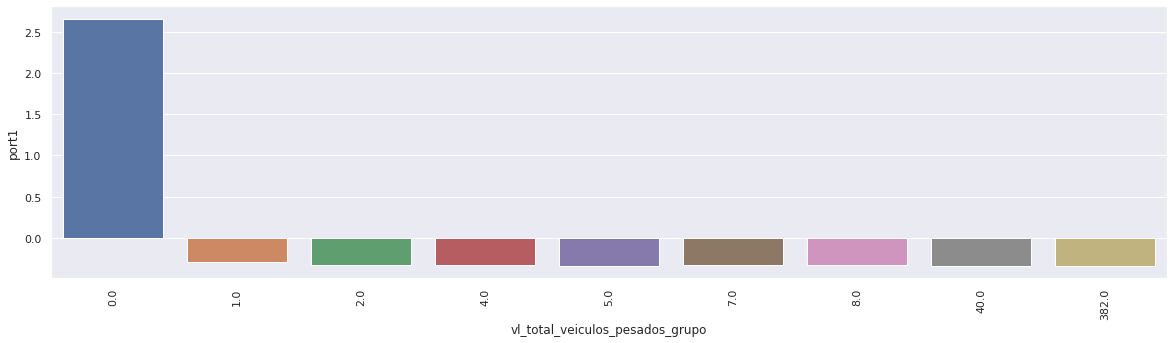

     vl_total_veiculos_pesados_grupo  port2
0                                0.0  237.0
1                                1.0   54.0
2                                2.0   41.0
3                                3.0   28.0
4                                4.0   25.0
..                               ...    ...
153                            179.0    1.0
155                            187.0    1.0
158                            190.0    1.0
169                            215.0    1.0
248                            663.0    1.0

[65 rows x 2 columns]


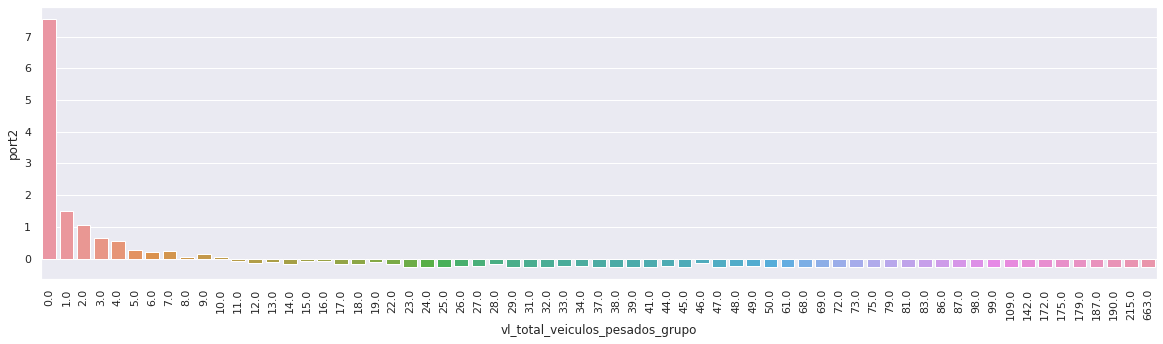

     vl_total_veiculos_pesados_grupo  port3
0                                0.0  105.0
1                                1.0   34.0
2                                2.0   11.0
3                                3.0   11.0
4                                4.0   17.0
5                                5.0   11.0
6                                6.0   12.0
7                                7.0    7.0
8                                8.0   12.0
9                                9.0    7.0
10                              10.0    3.0
11                              11.0    2.0
12                              12.0    3.0
13                              13.0    4.0
14                              14.0    1.0
15                              15.0    1.0
16                              16.0    4.0
17                              17.0    2.0
18                              18.0    1.0
19                              19.0    1.0
25                              25.0    1.0
26                              

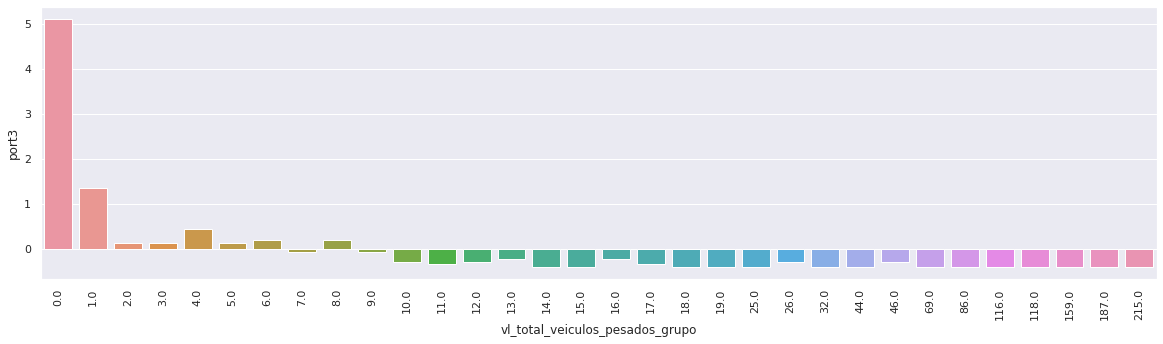

In [18]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
vl_tvpg = veiculos.groupby(['vl_total_veiculos_pesados_grupo'])['port1','port2','port3'].sum().reset_index()
#vl_tvpgp1 = vl_tvpg[(vl_tvpg['port1'] > 0) | (vl_tvpg['port2'] >  0) | (vl_tvpg['port3'] > 0)]
vl_tvpgp1 = vl_tvpg[(vl_tvpg['port1'] > 0)][['vl_total_veiculos_pesados_grupo','port1']]
vl_tvpgp2 = vl_tvpg[(vl_tvpg['port2'] > 0)][['vl_total_veiculos_pesados_grupo','port2']]
vl_tvpgp3 = vl_tvpg[(vl_tvpg['port3'] > 0)][['vl_total_veiculos_pesados_grupo','port3']]

# Aplicando o z score na coluna dos portfólios
vl_tvpgp1z = (vl_tvpgp1['port1'] - vl_tvpgp1['port1'].mean()) / vl_tvpgp1['port1'].std()
vl_tvpgp2z = (vl_tvpgp2['port2'] - vl_tvpgp2['port2'].mean()) / vl_tvpgp2['port2'].std()
vl_tvpgp3z = (vl_tvpgp3['port3'] - vl_tvpgp3['port3'].mean()) / vl_tvpgp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvpgp1[['vl_total_veiculos_pesados_grupo','port1']])
sns.barplot(data=vl_tvpgp1, x='vl_total_veiculos_pesados_grupo', y=vl_tvpgp1z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvpgp2[['vl_total_veiculos_pesados_grupo','port2']])
sns.barplot(data=vl_tvpgp2, x='vl_total_veiculos_pesados_grupo', y=vl_tvpgp2z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvpgp3[['vl_total_veiculos_pesados_grupo','port3']])
sns.barplot(data=vl_tvpgp3, x='vl_total_veiculos_pesados_grupo', y=vl_tvpgp3z);
plt.xticks(rotation=90)
plt.show()

### Verificando a variável vl_total_veiculos_leves_grupo

     vl_total_veiculos_leves_grupo  port1
0                              0.0  513.0
1                              1.0   23.0
2                              2.0    5.0
3                              3.0    7.0
4                              4.0    1.0
5                              5.0    1.0
6                              6.0    2.0
10                            10.0    1.0
17                            17.0    1.0
159                          199.0    1.0


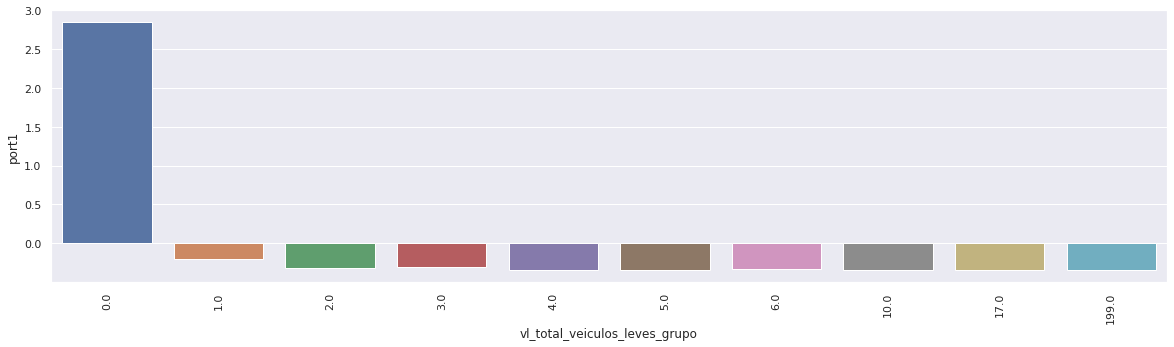

     vl_total_veiculos_leves_grupo  port2
0                              0.0  118.0
1                              1.0   56.0
2                              2.0   49.0
3                              3.0   43.0
4                              4.0   34.0
5                              5.0   39.0
6                              6.0   20.0
7                              7.0   20.0
8                              8.0   16.0
9                              9.0   15.0
10                            10.0   21.0
11                            11.0   21.0
12                            12.0    7.0
13                            13.0   12.0
14                            14.0    4.0
15                            15.0    7.0
16                            16.0    5.0
17                            17.0    4.0
18                            18.0    3.0
19                            19.0   10.0
20                            20.0    2.0
21                            21.0    2.0
22                            22.0

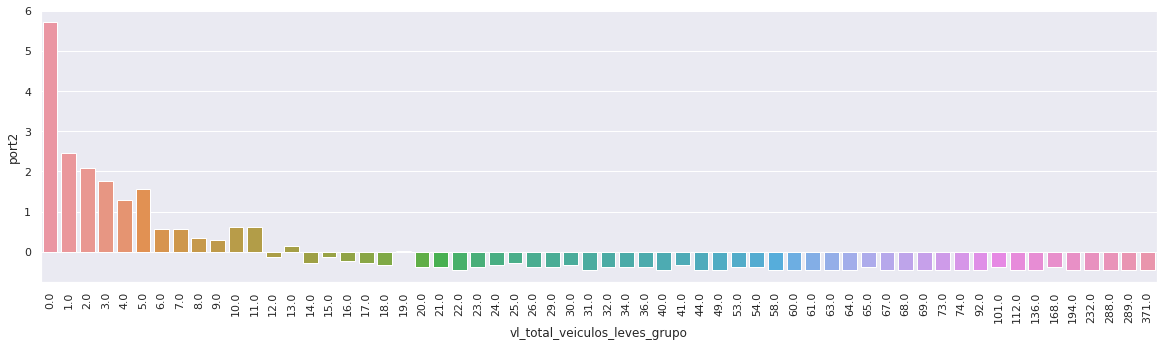

     vl_total_veiculos_leves_grupo  port3
0                              0.0   66.0
1                              1.0   31.0
2                              2.0   22.0
3                              3.0   20.0
4                              4.0   17.0
5                              5.0   13.0
6                              6.0   14.0
7                              7.0   14.0
8                              8.0    9.0
9                              9.0    3.0
10                            10.0    4.0
11                            11.0    9.0
12                            12.0    2.0
13                            13.0    2.0
14                            14.0    5.0
15                            15.0    3.0
16                            16.0    2.0
17                            17.0    1.0
18                            18.0    1.0
19                            19.0    3.0
22                            22.0    1.0
23                            23.0    1.0
24                            24.0

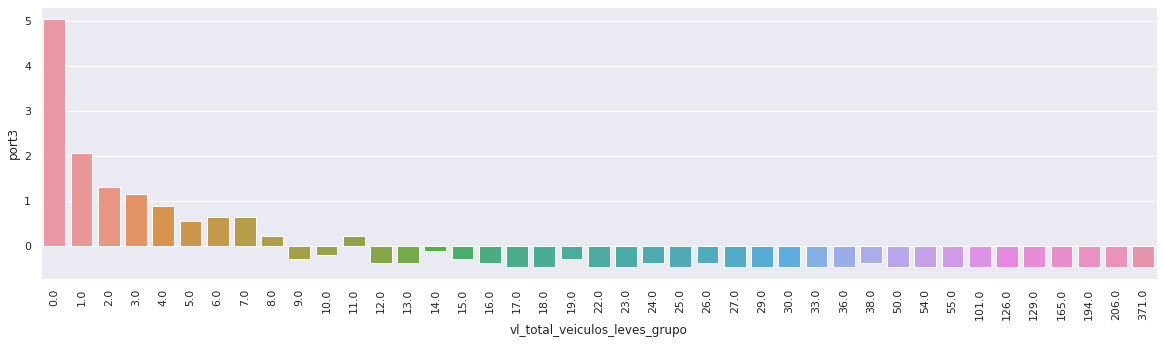

In [19]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
vl_tvlg = veiculos.groupby(['vl_total_veiculos_leves_grupo'])['port1','port2','port3'].sum().reset_index()
#vl_tvpgp1 = vl_tvpg[(vl_tvpg['port1'] > 0) | (vl_tvpg['port2'] >  0) | (vl_tvpg['port3'] > 0)]
vl_tvlgp1 = vl_tvlg[(vl_tvlg['port1'] > 0)][['vl_total_veiculos_leves_grupo','port1']]
vl_tvlgp2 = vl_tvlg[(vl_tvlg['port2'] > 0)][['vl_total_veiculos_leves_grupo','port2']]
vl_tvlgp3 = vl_tvlg[(vl_tvlg['port3'] > 0)][['vl_total_veiculos_leves_grupo','port3']]

# Aplicando o z score na coluna dos portfólios
vl_tvlgp1z = (vl_tvlgp1['port1'] - vl_tvlgp1['port1'].mean()) / vl_tvlgp1['port1'].std()
vl_tvlgp2z = (vl_tvlgp2['port2'] - vl_tvlgp2['port2'].mean()) / vl_tvlgp2['port2'].std()
vl_tvlgp3z = (vl_tvlgp3['port3'] - vl_tvlgp3['port3'].mean()) / vl_tvlgp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvlgp1[['vl_total_veiculos_leves_grupo','port1']])
sns.barplot(data=vl_tvlgp1, x='vl_total_veiculos_leves_grupo', y=vl_tvlgp1z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvlgp2[['vl_total_veiculos_leves_grupo','port2']])
sns.barplot(data=vl_tvlgp2, x='vl_total_veiculos_leves_grupo', y=vl_tvlgp2z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(vl_tvlgp3[['vl_total_veiculos_leves_grupo','port3']])
sns.barplot(data=vl_tvlgp3, x='vl_total_veiculos_leves_grupo', y=vl_tvlgp3z);
plt.xticks(rotation=90)
plt.show()

# Análise relatíva a `sócios`

In [20]:
socios = market[['id','qt_socios','qt_socios_pf','qt_socios_pj','idade_media_socios',
                 'idade_maxima_socios','idade_minima_socios','qt_socios_st_regular']]

- **qt_socios** -> quantidade sócios
- **qt_socios_pf** -> quantidade de sócios PF
- **qt_socios_pj** -> quantidade de sócios PJ
- **idade_media_socios** -> idade média dos sócios
- **idade_maxima_socios** -> igual máxima dos sócios
- **idade_minima_socios** -> igual mínima dos sócios
- **qt_socios_st_regular** -> quantidade dos sócios regulares na Receita Federal

In [21]:
socios.head()

,id,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,2.0,2.0,0.0,44.0,47.0,41.0,2.0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1.0,1.0,0.0,27.0,27.0,27.0,1.0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1.0,1.0,0.0,32.0,32.0,32.0,NaN
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1.0,1.0,0.0,36.0,36.0,36.0,1.0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1.0,1.0,0.0,NaN,NaN,NaN,NaN


In [22]:
socios['port1'] = socios.id.isin(port1.id)
socios['port2'] = socios.id.isin(port2.id)
socios['port3'] = socios.id.isin(port3.id)

/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/nilson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [23]:
socios.isnull().sum() / socios.count() * 100

id                       0.000000
qt_socios               33.147661
qt_socios_pf            33.147661
qt_socios_pj            33.147661
idade_media_socios      48.794320
idade_maxima_socios     48.794320
idade_minima_socios     48.794320
qt_socios_st_regular    50.399016
port1                    0.000000
port2                    0.000000
port3                    0.000000
dtype: float64

In [24]:
socios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Data columns (total 11 columns):
id                      462298 non-null object
qt_socios               347207 non-null float64
qt_socios_pf            347207 non-null float64
qt_socios_pj            347207 non-null float64
idade_media_socios      310696 non-null float64
idade_maxima_socios     310696 non-null float64
idade_minima_socios     310696 non-null float64
qt_socios_st_regular    307381 non-null float64
port1                   462298 non-null bool
port2                   462298 non-null bool
port3                   462298 non-null bool
dtypes: bool(3), float64(7), object(1)
memory usage: 29.5+ MB


Como são variáveis quantitativas irei lançar a mediana nos valores nulos 

In [25]:
socios.describe()

,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular
count,347207.000000,347207.000000,347207.000000,310696.000000,310696.000000,310696.000000,307381.000000
mean,1.496326,1.476681,0.019645,42.816452,44.344131,41.355225,1.396082
std,3.276626,3.258079,0.195166,12.626447,13.930385,12.514921,2.578793
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000
25%,1.000000,1.000000,0.000000,33.000000,34.000000,32.000000,1.000000
50%,1.000000,1.000000,0.000000,42.000000,43.000000,40.000000,1.000000
75%,2.000000,2.000000,0.000000,51.000000,54.000000,50.000000,1.000000
max,246.000000,246.000000,13.000000,127.000000,127.000000,127.000000,179.000000


In [26]:
socios.fillna(socios.quantile(0.5), inplace=True)

/home/nilson/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [27]:
socios.isnull().sum()

id                      0
qt_socios               0
qt_socios_pf            0
qt_socios_pj            0
idade_media_socios      0
idade_maxima_socios     0
idade_minima_socios     0
qt_socios_st_regular    0
port1                   0
port2                   0
port3                   0
dtype: int64

Fazendo dessa forma podemos perceber que perdemos um pouco nos valores

In [28]:
socios.describe()

,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular
count,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000,462298.000000
mean,1.372764,1.358009,0.014755,42.548712,43.903348,40.910804,1.263354
std,2.847717,2.831058,0.169350,10.358224,11.437515,10.279409,2.111074
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,1.000000
25%,1.000000,1.000000,0.000000,37.000000,38.000000,36.000000,1.000000
50%,1.000000,1.000000,0.000000,42.000000,43.000000,40.000000,1.000000
75%,1.000000,1.000000,0.000000,46.000000,48.000000,44.000000,1.000000
max,246.000000,246.000000,13.000000,127.000000,127.000000,127.000000,179.000000


### Verificando a variável qt_socios

   qt_socios  port1
0        1.0  462.0
1        2.0   81.0
2        3.0    9.0
3        4.0    1.0
4        5.0    1.0
8        9.0    1.0


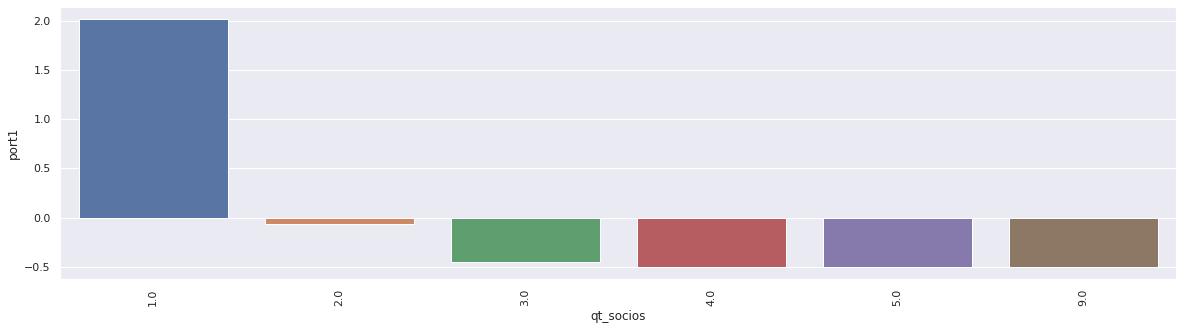

    qt_socios  port2
0         1.0  239.0
1         2.0  181.0
2         3.0   65.0
3         4.0   42.0
4         5.0   14.0
5         6.0   13.0
6         7.0    3.0
7         8.0    1.0
8         9.0    3.0
11       12.0    1.0
12       13.0    1.0
13       14.0    1.0
21       22.0    1.0
53      139.0    1.0


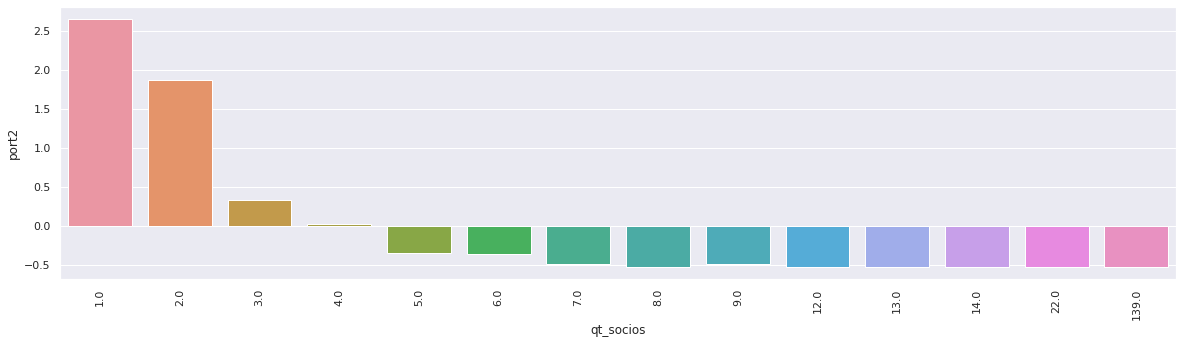

    qt_socios  port3
0         1.0  188.0
1         2.0   45.0
2         3.0   15.0
3         4.0    7.0
4         5.0    3.0
5         6.0    2.0
8         9.0    2.0
11       12.0    1.0
12       13.0    1.0
53      139.0    1.0


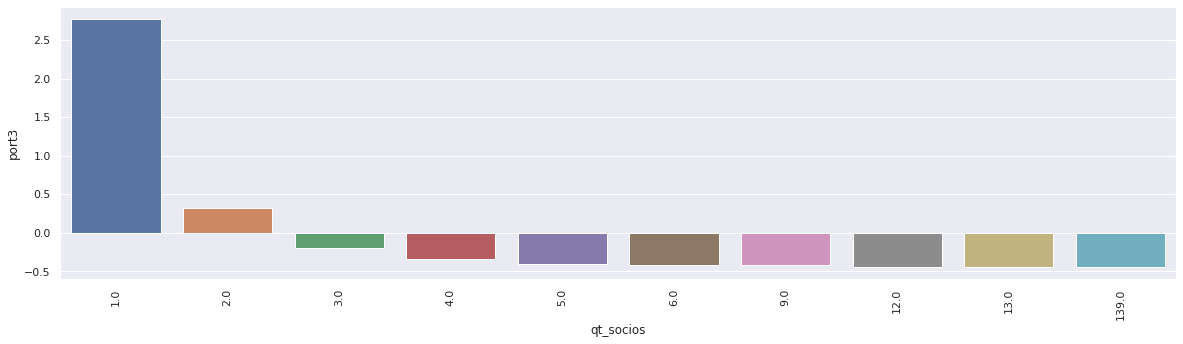

In [32]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
qt_socios = socios.groupby(['qt_socios'])['port1','port2','port3'].sum().reset_index()

qt_sociosp1 = qt_socios[(qt_socios['port1'] > 0)][['qt_socios','port1']]
qt_sociosp2 = qt_socios[(qt_socios['port2'] > 0)][['qt_socios','port2']]
qt_sociosp3 = qt_socios[(qt_socios['port3'] > 0)][['qt_socios','port3']]

# Aplicando o z score na coluna dos portfólios
qt_sociosp1z = (qt_sociosp1['port1'] - qt_sociosp1['port1'].mean()) / qt_sociosp1['port1'].std()
qt_sociosp2z = (qt_sociosp2['port2'] - qt_sociosp2['port2'].mean()) / qt_sociosp2['port2'].std()
qt_sociosp3z = (qt_sociosp3['port3'] - qt_sociosp3['port3'].mean()) / qt_sociosp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(qt_sociosp1[['qt_socios','port1']])
sns.barplot(data=qt_sociosp1, x='qt_socios', y=qt_sociosp1z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_sociosp2[['qt_socios','port2']])
sns.barplot(data=qt_sociosp2, x='qt_socios', y=qt_sociosp2z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_sociosp3[['qt_socios','port3']])
sns.barplot(data=qt_sociosp3, x='qt_socios', y=qt_sociosp3z);
plt.xticks(rotation=90)
plt.show()

### Verificando a variável qt_socios_pf

   qt_socios_pf  port1
1           1.0  464.0
2           2.0   80.0
3           3.0    8.0
4           4.0    1.0
5           5.0    1.0
9           9.0    1.0


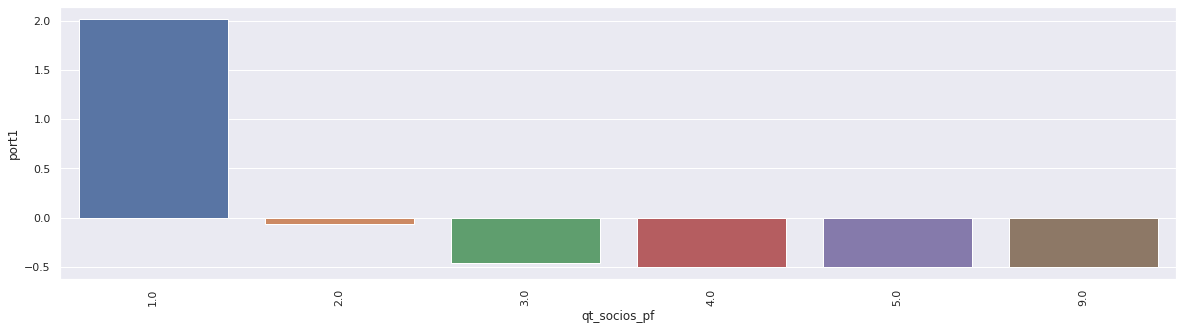

    qt_socios_pf  port2
1            1.0  255.0
2            2.0  190.0
3            3.0   53.0
4            4.0   34.0
5            5.0   12.0
6            6.0   10.0
7            7.0    4.0
9            9.0    3.0
10          10.0    1.0
11          11.0    1.0
14          14.0    1.0
21          21.0    1.0
55         139.0    1.0


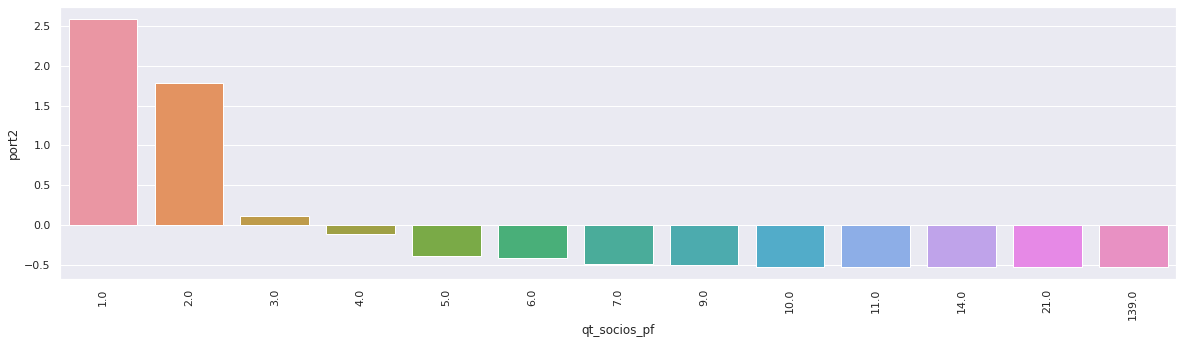

    qt_socios_pf  port3
1            1.0  191.0
2            2.0   50.0
3            3.0   10.0
4            4.0    7.0
5            5.0    3.0
9            9.0    1.0
10          10.0    1.0
13          13.0    1.0
55         139.0    1.0


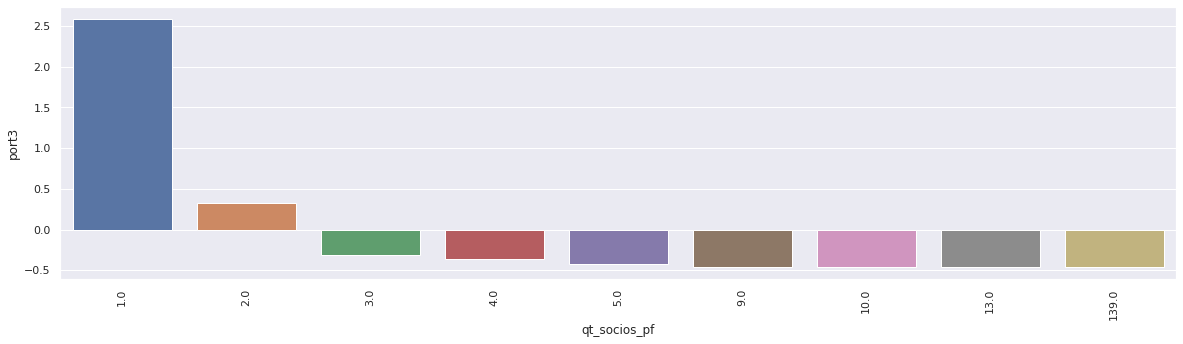

In [38]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
qt_socios_pf = socios.groupby(['qt_socios_pf'])['port1','port2','port3'].sum().reset_index()

qt_socios_pfp1 = qt_socios_pf[(qt_socios_pf['port1'] > 0)][['qt_socios_pf','port1']]
qt_socios_pfp2 = qt_socios_pf[(qt_socios_pf['port2'] > 0)][['qt_socios_pf','port2']]
qt_socios_pfp3 = qt_socios_pf[(qt_socios_pf['port3'] > 0)][['qt_socios_pf','port3']]

# Aplicando o z score na coluna dos portfólios
qt_socios_pfp1z = (qt_socios_pfp1['port1'] - qt_socios_pfp1['port1'].mean()) / qt_socios_pfp1['port1'].std()
qt_socios_pfp2z = (qt_socios_pfp2['port2'] - qt_socios_pfp2['port2'].mean()) / qt_socios_pfp2['port2'].std()
qt_socios_pfp3z = (qt_socios_pfp3['port3'] - qt_socios_pfp3['port3'].mean()) / qt_socios_pfp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pfp1[['qt_socios_pf','port1']])
sns.barplot(data=qt_socios_pfp1, x='qt_socios_pf', y=qt_socios_pfp1z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pfp2[['qt_socios_pf','port2']])
sns.barplot(data=qt_socios_pfp2, x='qt_socios_pf', y=qt_socios_pfp2z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pfp3[['qt_socios_pf','port3']])
sns.barplot(data=qt_socios_pfp3, x='qt_socios_pf', y=qt_socios_pfp3z);
plt.xticks(rotation=90)
plt.show()

### Verificando a variável qt_socios_pj

   qt_socios_pj  port1
0           0.0  553.0
1           1.0    1.0
2           2.0    1.0


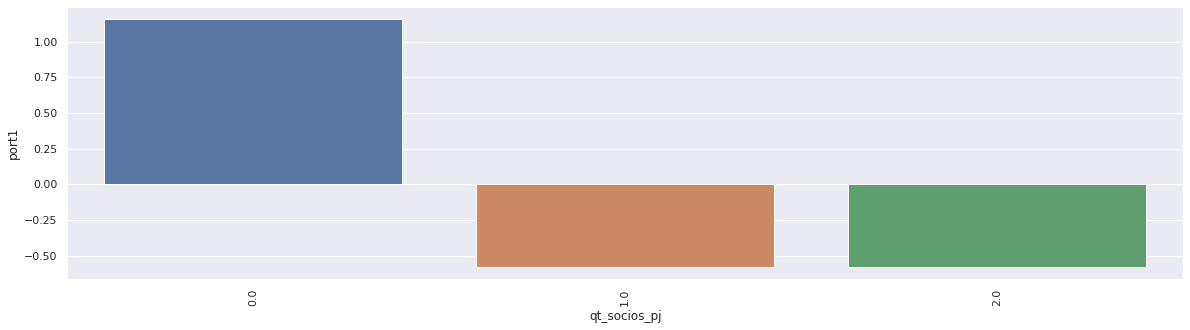

   qt_socios_pj  port2
0           0.0  515.0
1           1.0   35.0
2           2.0   15.0
3           3.0    1.0


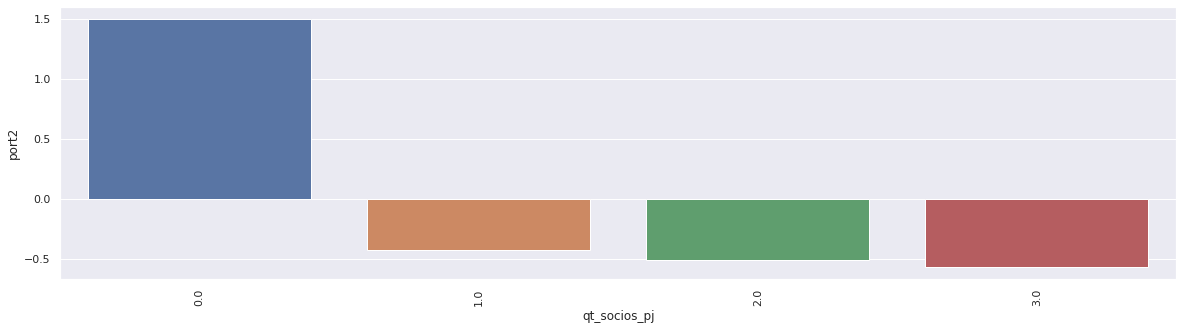

   qt_socios_pj  port3
0           0.0  250.0
1           1.0    9.0
2           2.0    4.0
3           3.0    1.0
5           5.0    1.0


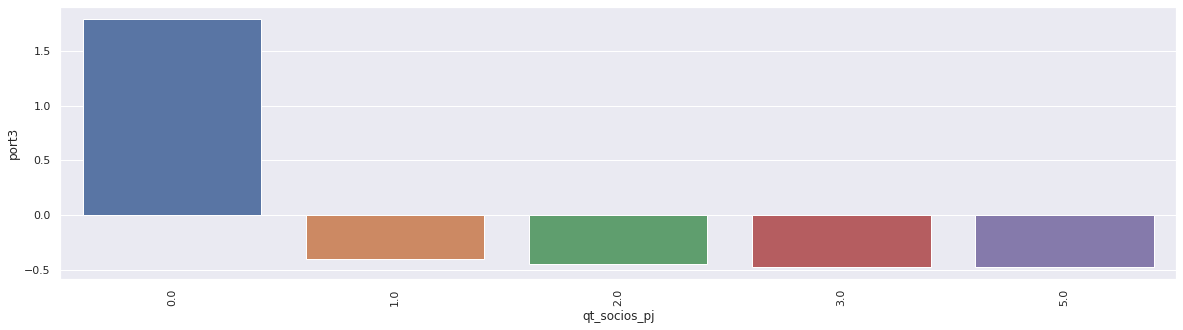

In [39]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
qt_socios_pj = socios.groupby(['qt_socios_pj'])['port1','port2','port3'].sum().reset_index()

qt_socios_pjp1 = qt_socios_pj[(qt_socios_pj['port1'] > 0)][['qt_socios_pj','port1']]
qt_socios_pjp2 = qt_socios_pj[(qt_socios_pj['port2'] > 0)][['qt_socios_pj','port2']]
qt_socios_pjp3 = qt_socios_pj[(qt_socios_pj['port3'] > 0)][['qt_socios_pj','port3']]

# Aplicando o z score na coluna dos portfólios
qt_socios_pjp1z = (qt_socios_pjp1['port1'] - qt_socios_pjp1['port1'].mean()) / qt_socios_pjp1['port1'].std()
qt_socios_pjp2z = (qt_socios_pjp2['port2'] - qt_socios_pjp2['port2'].mean()) / qt_socios_pjp2['port2'].std()
qt_socios_pjp3z = (qt_socios_pjp3['port3'] - qt_socios_pjp3['port3'].mean()) / qt_socios_pjp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pjp1[['qt_socios_pj','port1']])
sns.barplot(data=qt_socios_pjp1, x='qt_socios_pj', y=qt_socios_pjp1z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pjp2[['qt_socios_pj','port2']])
sns.barplot(data=qt_socios_pjp2, x='qt_socios_pj', y=qt_socios_pjp2z);
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_pjp3[['qt_socios_pj','port3']])
sns.barplot(data=qt_socios_pjp3, x='qt_socios_pj', y=qt_socios_pjp3z);
plt.xticks(rotation=90)
plt.show()

### Verificando a variável idade_media_socios

     idade_media_socios  port1
6                   7.5    1.0
27                 18.0    2.0
35                 20.0    4.0
40                 21.0    2.0
51                 23.0    4.0
..                  ...    ...
889                73.0    1.0
908                75.0    1.0
915                76.0    2.0
917                76.5    1.0
946                81.0    1.0

[80 rows x 2 columns]


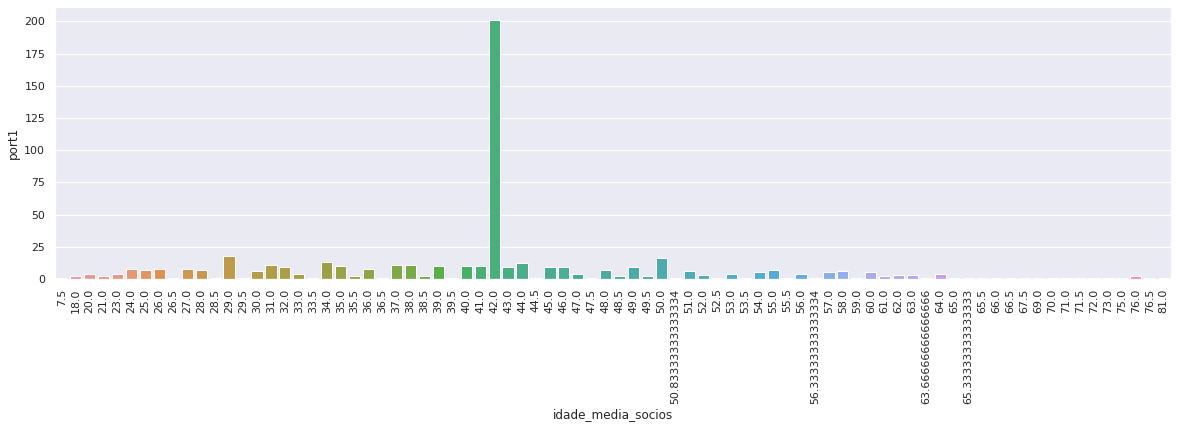

     idade_media_socios  port2
35            20.000000    1.0
76            27.000000    2.0
82            28.000000    1.0
91            29.000000    1.0
95            29.500000    1.0
..                  ...    ...
917           76.500000    1.0
930           78.000000    1.0
936           79.000000    2.0
942           80.142857    1.0
977           90.000000    2.0

[143 rows x 2 columns]


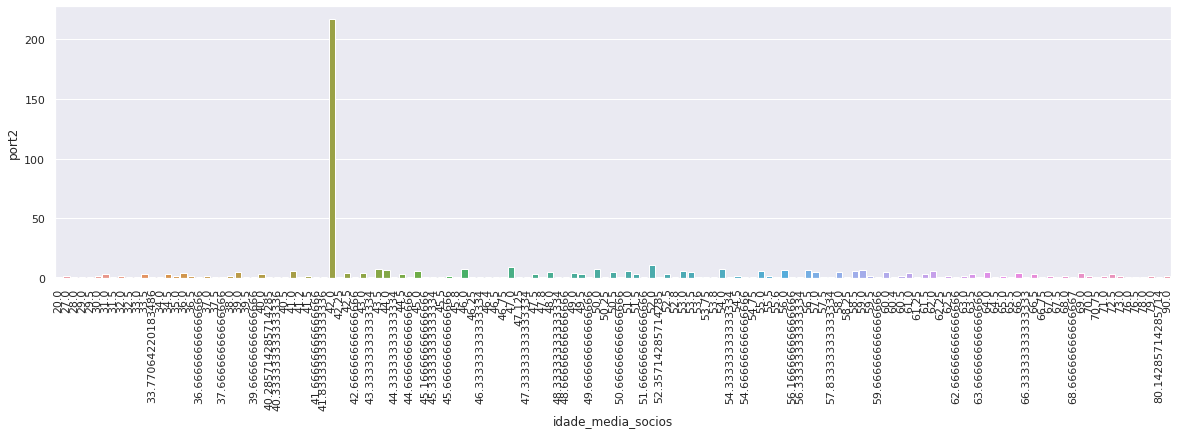

     idade_media_socios  port3
2              4.000000    1.0
76            27.000000    2.0
82            28.000000    1.0
88            28.500000    1.0
99            30.000000    1.0
..                  ...    ...
867           70.750000    1.0
870           71.000000    1.0
880           72.000000    1.0
913           75.666667    1.0
977           90.000000    1.0

[62 rows x 2 columns]


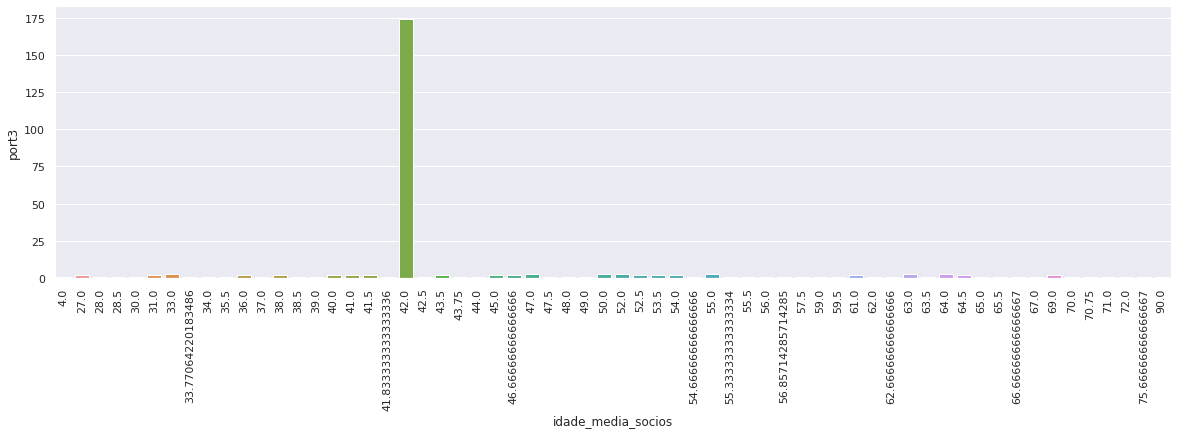

In [43]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
idade_media_socios = socios.groupby(['idade_media_socios'])['port1','port2','port3'].sum().reset_index()

idade_media_sociosp1 = idade_media_socios[(idade_media_socios['port1'] > 0)][['idade_media_socios','port1']]
idade_media_sociosp2 = idade_media_socios[(idade_media_socios['port2'] > 0)][['idade_media_socios','port2']]
idade_media_sociosp3 = idade_media_socios[(idade_media_socios['port3'] > 0)][['idade_media_socios','port3']]

# Aplicando o z score na coluna dos portfólios
#idade_media_sociosp1z = (idade_media_sociosp1['port1'] - idade_media_sociosp1['port1'].mean()) / idade_media_sociosp1['port1'].std()
#idade_media_sociosp2z = (idade_media_sociosp2['port2'] - idade_media_sociosp2['port2'].mean()) / idade_media_sociosp2['port2'].std()
#idade_media_sociosp3z = (idade_media_sociosp3['port3'] - idade_media_sociosp3['port3'].mean()) / idade_media_sociosp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(idade_media_sociosp1[['idade_media_socios','port1']])
sns.barplot(data=idade_media_sociosp1, x='idade_media_socios', y='port1');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_media_sociosp2[['idade_media_socios','port2']])
sns.barplot(data=idade_media_sociosp2, x='idade_media_socios', y='port2');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_media_sociosp3[['idade_media_socios','port3']])
sns.barplot(data=idade_media_sociosp3, x='idade_media_socios', y='port3');
plt.xticks(rotation=90)
plt.show()

### Verificando a variável idade_media_socios

    idade_maxima_socios  port1
7                   9.0    1.0
16                 18.0    2.0
18                 20.0    4.0
19                 21.0    2.0
21                 23.0    4.0
..                  ...    ...
74                 76.0    2.0
76                 78.0    1.0
77                 79.0    1.0
80                 82.0    1.0
81                 83.0    1.0

[62 rows x 2 columns]


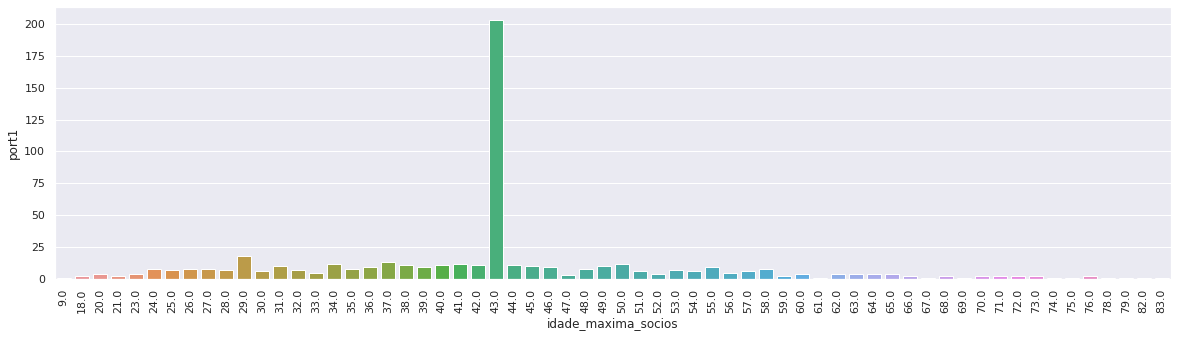

    idade_maxima_socios  port2
18                 20.0    1.0
26                 28.0    1.0
27                 29.0    1.0
28                 30.0    2.0
29                 31.0    3.0
..                  ...    ...
81                 83.0    2.0
82                 84.0    2.0
84                 86.0    1.0
87                 89.0    1.0
88                 90.0    3.0

[61 rows x 2 columns]


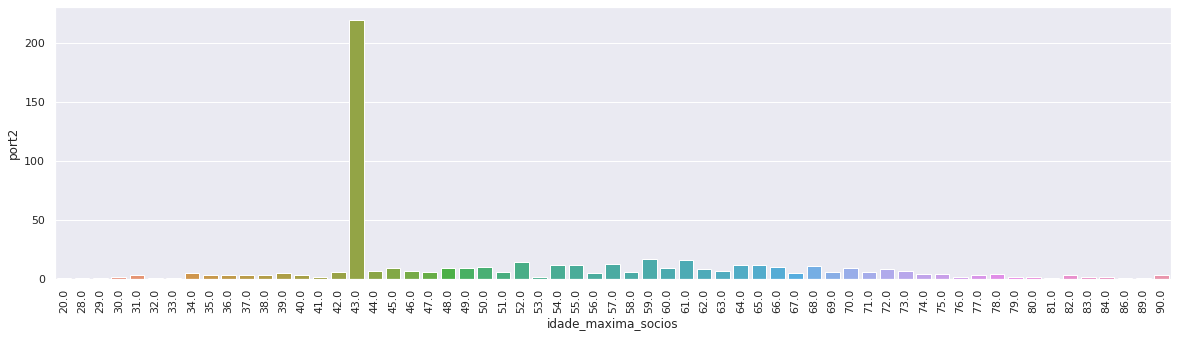

    idade_maxima_socios  port3
2                   4.0    1.0
25                 27.0    1.0
27                 29.0    1.0
28                 30.0    1.0
29                 31.0    1.0
30                 32.0    2.0
31                 33.0    3.0
34                 36.0    2.0
35                 37.0    1.0
36                 38.0    1.0
37                 39.0    1.0
38                 40.0    2.0
39                 41.0    2.0
40                 42.0    2.0
41                 43.0  172.0
42                 44.0    2.0
43                 45.0    1.0
45                 47.0    3.0
46                 48.0    2.0
47                 49.0    4.0
48                 50.0    4.0
49                 51.0    3.0
50                 52.0    2.0
52                 54.0    5.0
53                 55.0    3.0
54                 56.0    2.0
55                 57.0    1.0
56                 58.0    1.0
57                 59.0    2.0
58                 60.0    1.0
59                 61.0    2.0
60      

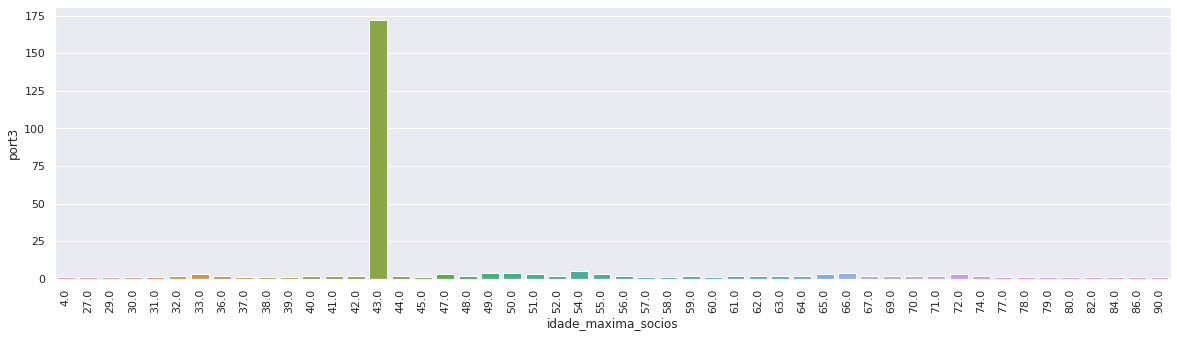

In [48]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
idade_maxima_socios = socios.groupby(['idade_maxima_socios'])['port1','port2','port3'].sum().reset_index()

idade_maxima_sociosp1 = idade_maxima_socios[(idade_maxima_socios['port1'] > 0)][['idade_maxima_socios','port1']]
idade_maxima_sociosp2 = idade_maxima_socios[(idade_maxima_socios['port2'] > 0)][['idade_maxima_socios','port2']]
idade_maxima_sociosp3 = idade_maxima_socios[(idade_maxima_socios['port3'] > 0)][['idade_maxima_socios','port3']]

# Aplicando o z score na coluna dos portfólios
#idade_media_sociosp1z = (idade_media_sociosp1['port1'] - idade_media_sociosp1['port1'].mean()) / idade_media_sociosp1['port1'].std()
#idade_media_sociosp2z = (idade_media_sociosp2['port2'] - idade_media_sociosp2['port2'].mean()) / idade_media_sociosp2['port2'].std()
#idade_media_sociosp3z = (idade_media_sociosp3['port3'] - idade_media_sociosp3['port3'].mean()) / idade_media_sociosp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(idade_maxima_sociosp1[['idade_maxima_socios','port1']])
sns.barplot(data=idade_maxima_sociosp1, x='idade_maxima_socios', y='port1');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_maxima_sociosp2[['idade_maxima_socios','port2']])
sns.barplot(data=idade_maxima_sociosp2, x='idade_maxima_socios', y='port2');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_maxima_sociosp3[['idade_maxima_socios','port3']])
sns.barplot(data=idade_maxima_sociosp3, x='idade_maxima_socios', y='port3');
plt.xticks(rotation=90)
plt.show()

### Verificando a variável idade_minima_socios

    idade_minima_socios  port1
5                   6.0    1.0
14                 15.0    1.0
16                 17.0    1.0
17                 18.0    2.0
19                 20.0    4.0
20                 21.0    3.0
22                 23.0    5.0
23                 24.0   11.0
24                 25.0    9.0
25                 26.0    9.0
26                 27.0   10.0
27                 28.0    7.0
28                 29.0   19.0
29                 30.0    8.0
30                 31.0   13.0
31                 32.0    8.0
32                 33.0    5.0
33                 34.0   13.0
34                 35.0    7.0
35                 36.0   11.0
36                 37.0   12.0
37                 38.0   11.0
38                 39.0   10.0
39                 40.0  204.0
40                 41.0   11.0
41                 42.0   10.0
42                 43.0    9.0
43                 44.0   10.0
44                 45.0   10.0
45                 46.0   10.0
46                 47.0    6.0
47      

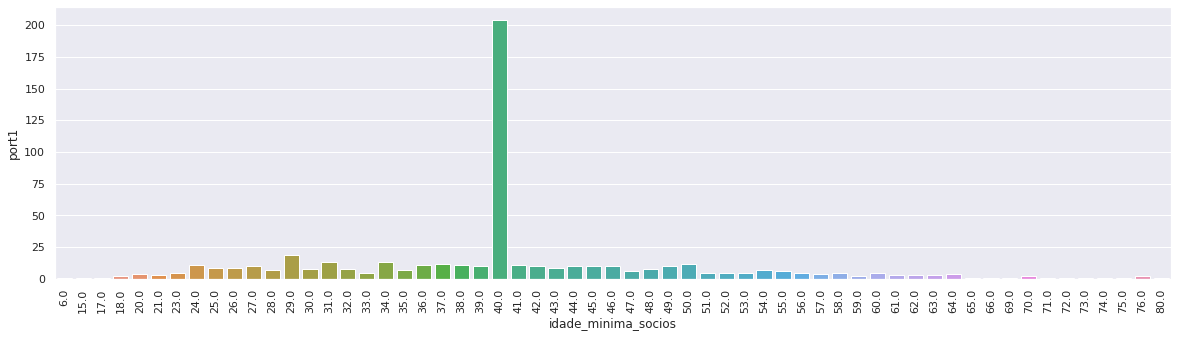

    idade_minima_socios  port2
11                 12.0    1.0
18                 19.0    1.0
19                 20.0    1.0
20                 21.0    2.0
21                 22.0    1.0
..                  ...    ...
74                 75.0    1.0
75                 76.0    2.0
77                 78.0    1.0
78                 79.0    1.0
89                 90.0    2.0

[61 rows x 2 columns]


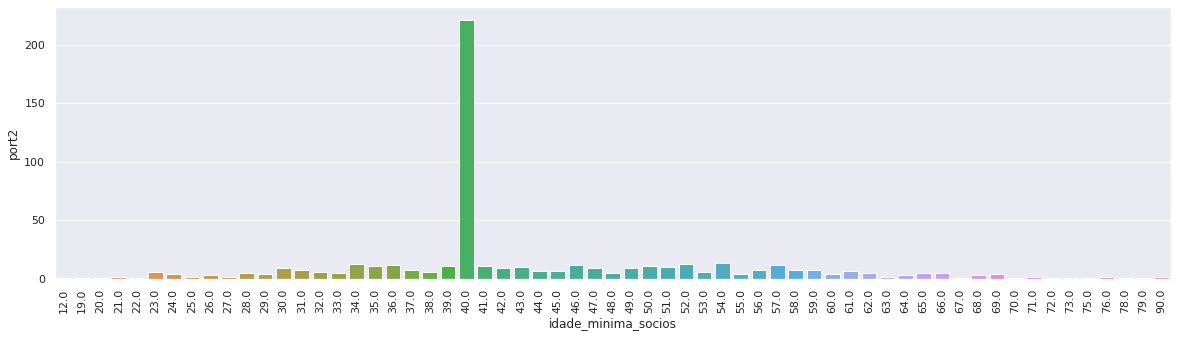

    idade_minima_socios  port3
3                   4.0    1.0
11                 12.0    1.0
16                 17.0    1.0
22                 23.0    1.0
23                 24.0    1.0
25                 26.0    1.0
26                 27.0    2.0
27                 28.0    3.0
28                 29.0    1.0
29                 30.0    3.0
30                 31.0    1.0
31                 32.0    2.0
32                 33.0    5.0
33                 34.0    1.0
34                 35.0    2.0
35                 36.0    4.0
36                 37.0    1.0
37                 38.0    1.0
38                 39.0    3.0
39                 40.0  173.0
40                 41.0    3.0
41                 42.0    4.0
42                 43.0    2.0
43                 44.0    1.0
44                 45.0    2.0
45                 46.0    1.0
46                 47.0    3.0
47                 48.0    3.0
49                 50.0    4.0
50                 51.0    1.0
51                 52.0    4.0
52      

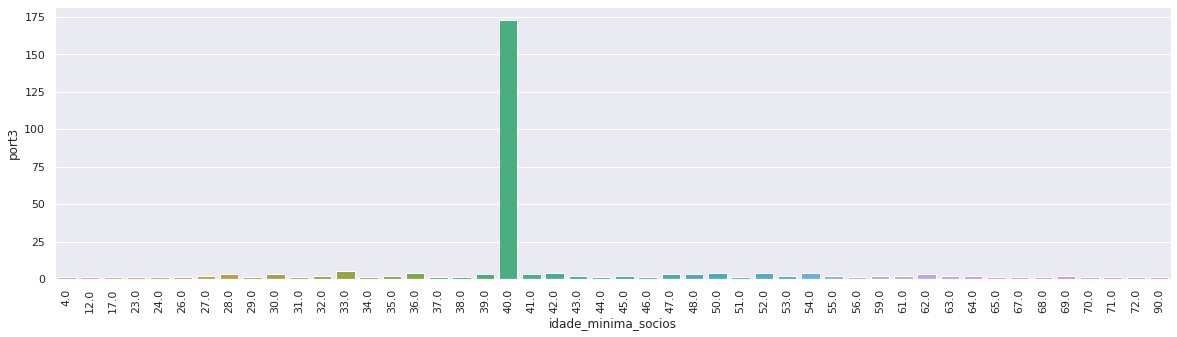

In [49]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
idade_minima_socios = socios.groupby(['idade_minima_socios'])['port1','port2','port3'].sum().reset_index()

idade_minima_sociosp1 = idade_minima_socios[(idade_minima_socios['port1'] > 0)][['idade_minima_socios','port1']]
idade_minima_sociosp2 = idade_minima_socios[(idade_minima_socios['port2'] > 0)][['idade_minima_socios','port2']]
idade_minima_sociosp3 = idade_minima_socios[(idade_minima_socios['port3'] > 0)][['idade_minima_socios','port3']]

# Aplicando o z score na coluna dos portfólios
#idade_media_sociosp1z = (idade_media_sociosp1['port1'] - idade_media_sociosp1['port1'].mean()) / idade_media_sociosp1['port1'].std()
#idade_media_sociosp2z = (idade_media_sociosp2['port2'] - idade_media_sociosp2['port2'].mean()) / idade_media_sociosp2['port2'].std()
#idade_media_sociosp3z = (idade_media_sociosp3['port3'] - idade_media_sociosp3['port3'].mean()) / idade_media_sociosp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(idade_minima_sociosp1[['idade_minima_socios','port1']])
sns.barplot(data=idade_minima_sociosp1, x='idade_minima_socios', y='port1');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_minima_sociosp2[['idade_minima_socios','port2']])
sns.barplot(data=idade_minima_sociosp2, x='idade_minima_socios', y='port2');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(idade_minima_sociosp3[['idade_minima_socios','port3']])
sns.barplot(data=idade_minima_sociosp3, x='idade_minima_socios', y='port3');
plt.xticks(rotation=90)
plt.show()

### Verificando a variável qt_socios_st_regular

   qt_socios_st_regular  port1
0                   1.0  495.0
1                   2.0   54.0
2                   3.0    4.0
3                   4.0    1.0
5                   6.0    1.0


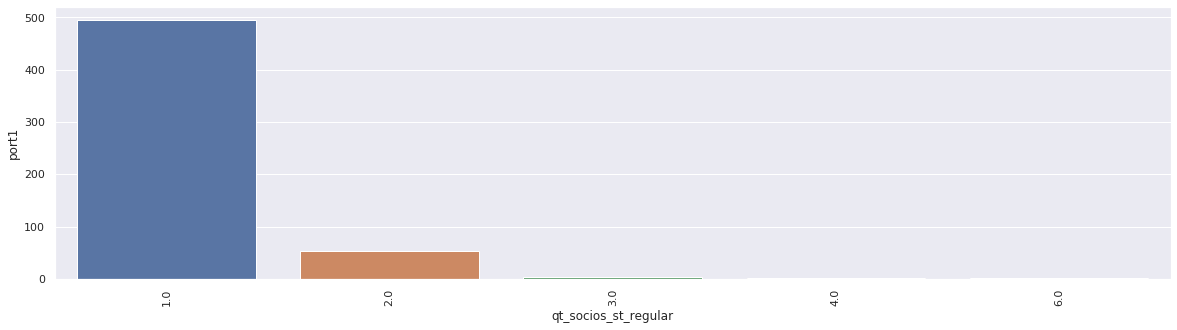

    qt_socios_st_regular  port2
0                    1.0  313.0
1                    2.0  168.0
2                    3.0   32.0
3                    4.0   29.0
4                    5.0    8.0
5                    6.0   10.0
6                    7.0    2.0
9                   10.0    1.0
13                  14.0    1.0
15                  16.0    1.0
47                 109.0    1.0


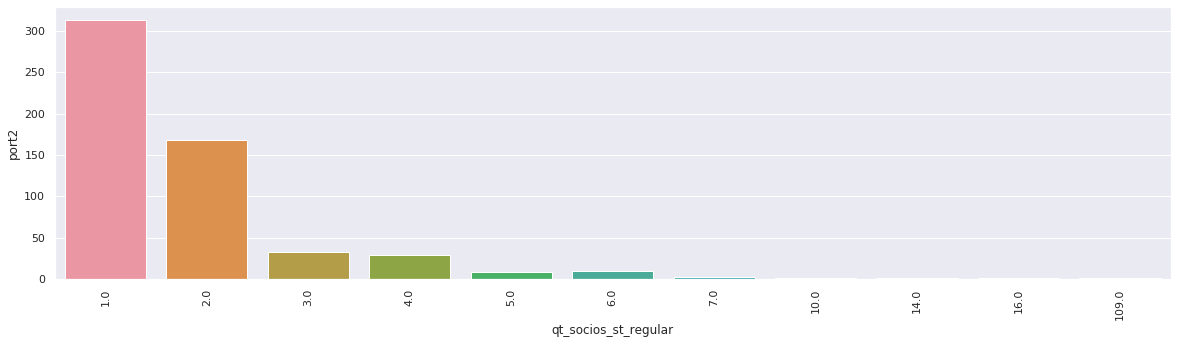

    qt_socios_st_regular  port3
0                    1.0  210.0
1                    2.0   36.0
2                    3.0    9.0
3                    4.0    6.0
5                    6.0    2.0
6                    7.0    1.0
47                 109.0    1.0


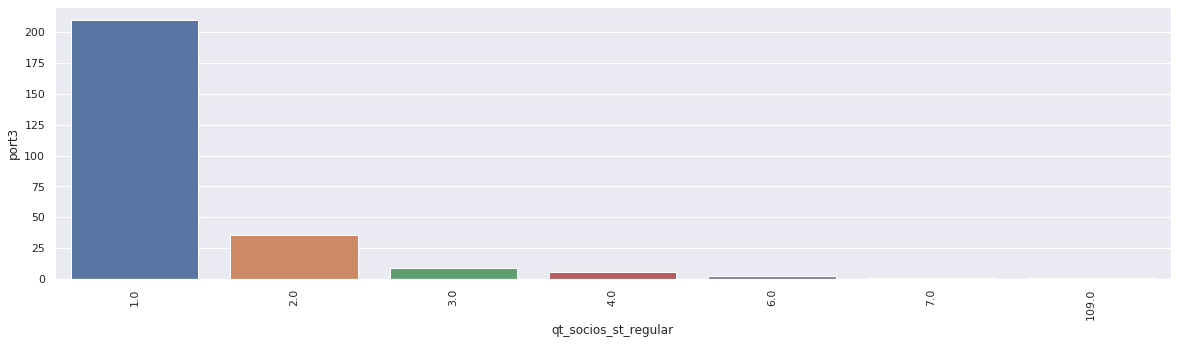

In [94]:
# Fazendo o groupby e trazendo apenas os valores que eram maiores que 0 (zero) nos portfólios
qt_socios_st_regular = socios.groupby(['qt_socios_st_regular'])['port1','port2','port3'].sum().reset_index()

qt_socios_st_regularp1 = qt_socios_st_regular[(qt_socios_st_regular['port1'] > 0)][['qt_socios_st_regular','port1']]
qt_socios_st_regularp2 = qt_socios_st_regular[(qt_socios_st_regular['port2'] > 0)][['qt_socios_st_regular','port2']]
qt_socios_st_regularp3 = qt_socios_st_regular[(qt_socios_st_regular['port3'] > 0)][['qt_socios_st_regular','port3']]

# Aplicando o z score na coluna dos portfólios
#idade_media_sociosp1z = (idade_media_sociosp1['port1'] - idade_media_sociosp1['port1'].mean()) / idade_media_sociosp1['port1'].std()
#idade_media_sociosp2z = (idade_media_sociosp2['port2'] - idade_media_sociosp2['port2'].mean()) / idade_media_sociosp2['port2'].std()
#idade_media_sociosp3z = (idade_media_sociosp3['port3'] - idade_media_sociosp3['port3'].mean()) / idade_media_sociosp3['port3'].std()

# plotando os gráficos
fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_st_regularp1[['qt_socios_st_regular','port1']])
sns.barplot(data=qt_socios_st_regularp1, x='qt_socios_st_regular', y='port1');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_st_regularp2[['qt_socios_st_regular','port2']])
sns.barplot(data=qt_socios_st_regularp2, x='qt_socios_st_regular', y='port2');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print(qt_socios_st_regularp3[['qt_socios_st_regular','port3']])
sns.barplot(data=qt_socios_st_regularp3, x='qt_socios_st_regular', y='port3');
plt.xticks(rotation=90)
plt.show()

### Quantidade de qt_socios X qt_socios_st_regular

------------------------------
Gráfico Portfólio 1 

>> Sócios 

   qt_socios  port1
0        1.0  462.0
1        2.0   81.0
2        3.0    9.0
3        4.0    1.0
4        5.0    1.0
8        9.0    1.0


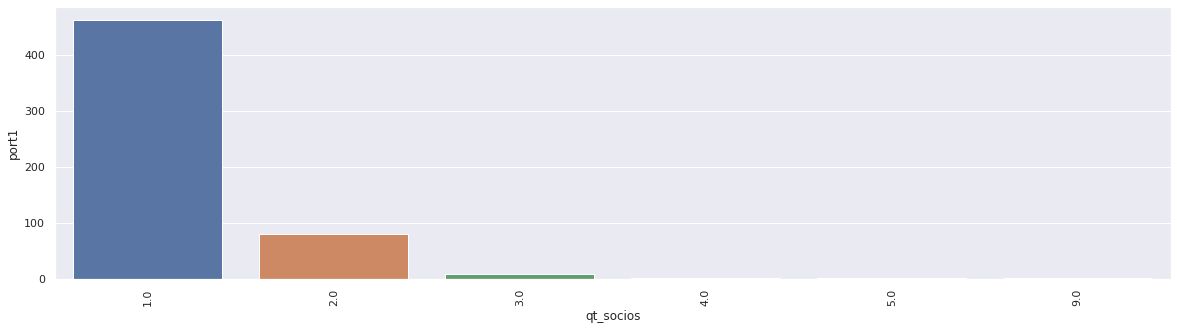


>> Sócios em situação regular 

   qt_socios_st_regular  port1
0                   1.0  495.0
1                   2.0   54.0
2                   3.0    4.0
3                   4.0    1.0
5                   6.0    1.0


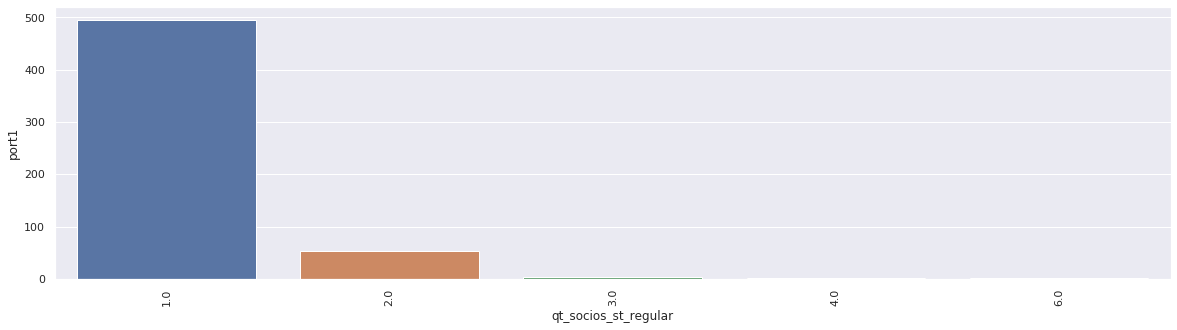

------------------------------
Gráfico Portfólio 2 

>> Sócios 

    qt_socios  port2
0         1.0  239.0
1         2.0  181.0
2         3.0   65.0
3         4.0   42.0
4         5.0   14.0
5         6.0   13.0
6         7.0    3.0
7         8.0    1.0
8         9.0    3.0
11       12.0    1.0
12       13.0    1.0
13       14.0    1.0
21       22.0    1.0
53      139.0    1.0


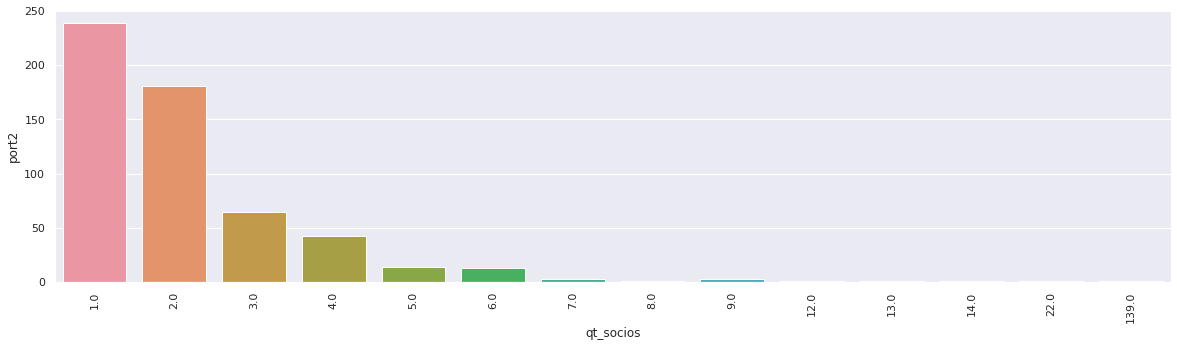


>> Sócios em situação regular 

    qt_socios_st_regular  port2
0                    1.0  313.0
1                    2.0  168.0
2                    3.0   32.0
3                    4.0   29.0
4                    5.0    8.0
5                    6.0   10.0
6                    7.0    2.0
9                   10.0    1.0
13                  14.0    1.0
15                  16.0    1.0
47                 109.0    1.0


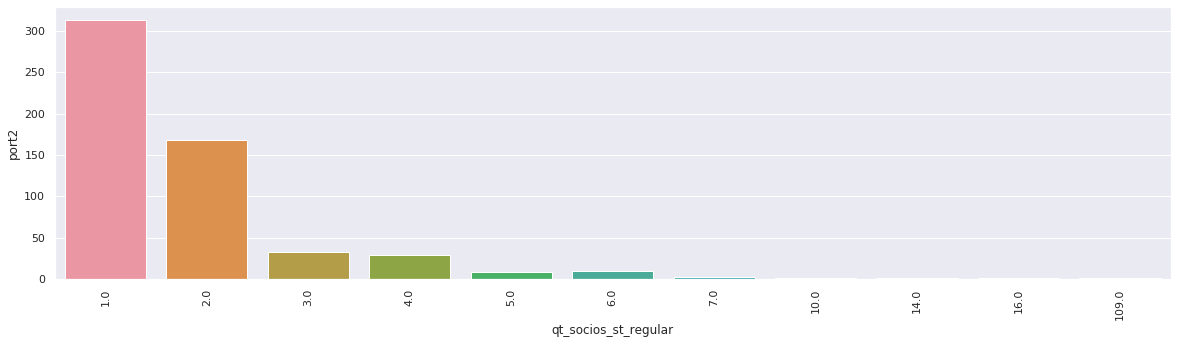

------------------------------
Gráfico Portfólio 3 

>> Sócios 

    qt_socios  port3
0         1.0  188.0
1         2.0   45.0
2         3.0   15.0
3         4.0    7.0
4         5.0    3.0
5         6.0    2.0
8         9.0    2.0
11       12.0    1.0
12       13.0    1.0
53      139.0    1.0


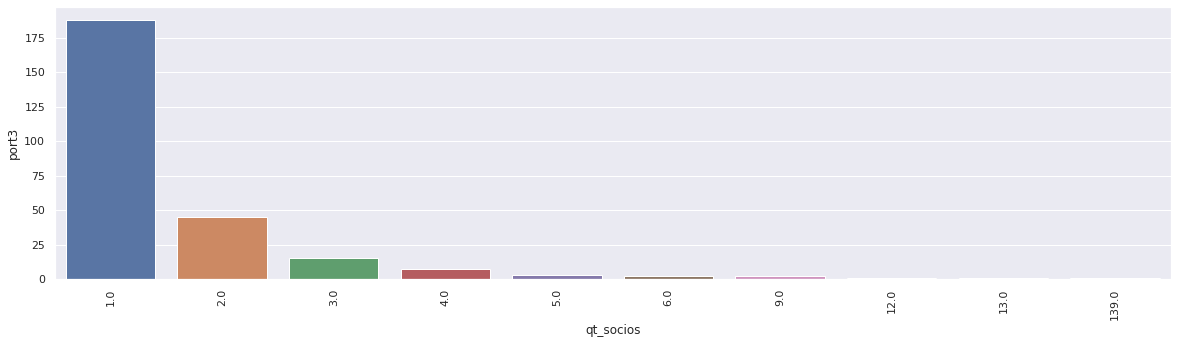


>> Sócios em situação regular 

    qt_socios_st_regular  port3
0                    1.0  210.0
1                    2.0   36.0
2                    3.0    9.0
3                    4.0    6.0
5                    6.0    2.0
6                    7.0    1.0
47                 109.0    1.0


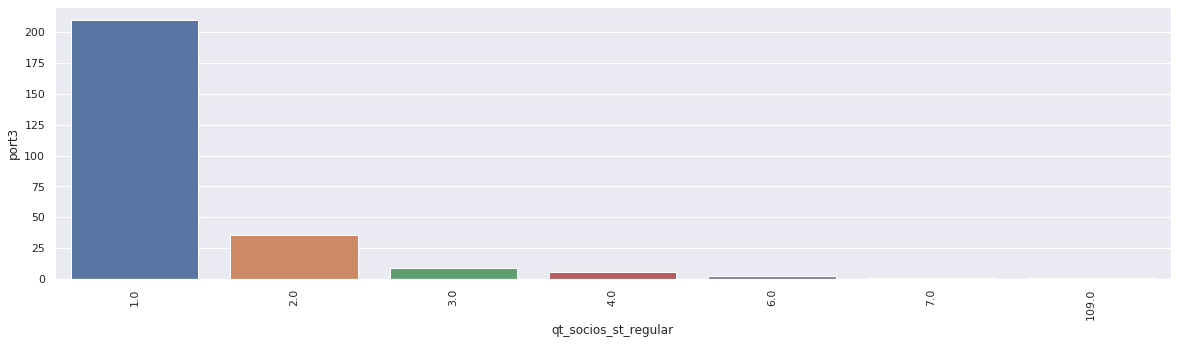

In [81]:
# gráficos p1
print('-'*30)
print('Gráfico Portfólio 1 \n')
fig, ax = plt.subplots(figsize=(20,5))
print('>> Sócios \n')
print(qt_sociosp1[['qt_socios','port1']])
sns.barplot(data=qt_sociosp1, x='qt_socios', y='port1');
plt.xticks(rotation=90)
plt.show()
# gráfico qt_socios_st_regular
fig, ax = plt.subplots(figsize=(20,5))
print('')
print('>> Sócios em situação regular \n')
print(qt_socios_st_regularp1[['qt_socios_st_regular','port1']])
sns.barplot(data=qt_socios_st_regularp1, x='qt_socios_st_regular', y='port1');
plt.xticks(rotation=90)
plt.show()


# gráficos p2
print('-'*30)
print('Gráfico Portfólio 2 \n')
fig, ax = plt.subplots(figsize=(20,5))
print('>> Sócios \n')
print(qt_sociosp2[['qt_socios','port2']])
sns.barplot(data=qt_sociosp2, x='qt_socios', y='port2');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print('')
print('>> Sócios em situação regular \n')
print(qt_socios_st_regularp2[['qt_socios_st_regular','port2']])
sns.barplot(data=qt_socios_st_regularp2, x='qt_socios_st_regular', y='port2');
plt.xticks(rotation=90)
plt.show()


# Gráficos p3
print('-'*30)
print('Gráfico Portfólio 3 \n')
fig, ax = plt.subplots(figsize=(20,5))
print('>> Sócios \n')
print(qt_sociosp3[['qt_socios','port3']])
sns.barplot(data=qt_sociosp3, x='qt_socios', y='port3');
plt.xticks(rotation=90)
plt.show()

fig, ax = plt.subplots(figsize=(20,5))
print('')
print('>> Sócios em situação regular \n')
print(qt_socios_st_regularp3[['qt_socios_st_regular','port3']])
sns.barplot(data=qt_socios_st_regularp3, x='qt_socios_st_regular', y='port3');
plt.xticks(rotation=90)
plt.show()

In [95]:
qt_socios.loc[qt_socios['qt_socios']==109.0]

,qt_socios,port1,port2,port3
51,109.0,0.0,0.0,0.0


In [96]:
qt_socios_st_regular.loc[qt_socios_st_regular['qt_socios_st_regular']==109.0]

,qt_socios_st_regular,port1,port2,port3
47,109.0,0.0,1.0,1.0
